# import

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from os import path

In [3]:
import tabint as tb
from tabint.pre_processing import *
from tabint.dataset import *
from tabint.learner import *
from tabint.feature import *
from tabint.interpretation import *

In [15]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

import torch.nn as nn

# read file

In [4]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [5]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [6]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# train test split from sklearn

In [7]:
ds = TBDataset.from_SklearnSplit(app_train_proc, y)

# baseline model

In [8]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [9]:
learner = LGBLearner()

In [10]:
learner.fit(params, *ds.trn(), *ds.val())

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.245224	valid_1's binary_logloss: 0.25034
[200]	training's binary_logloss: 0.237243	valid_1's binary_logloss: 0.24759
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.237243	valid_1's binary_logloss: 0.24759


# dendrogram

In [15]:
ddg = Dendogram.from_df(ds.x_trn)

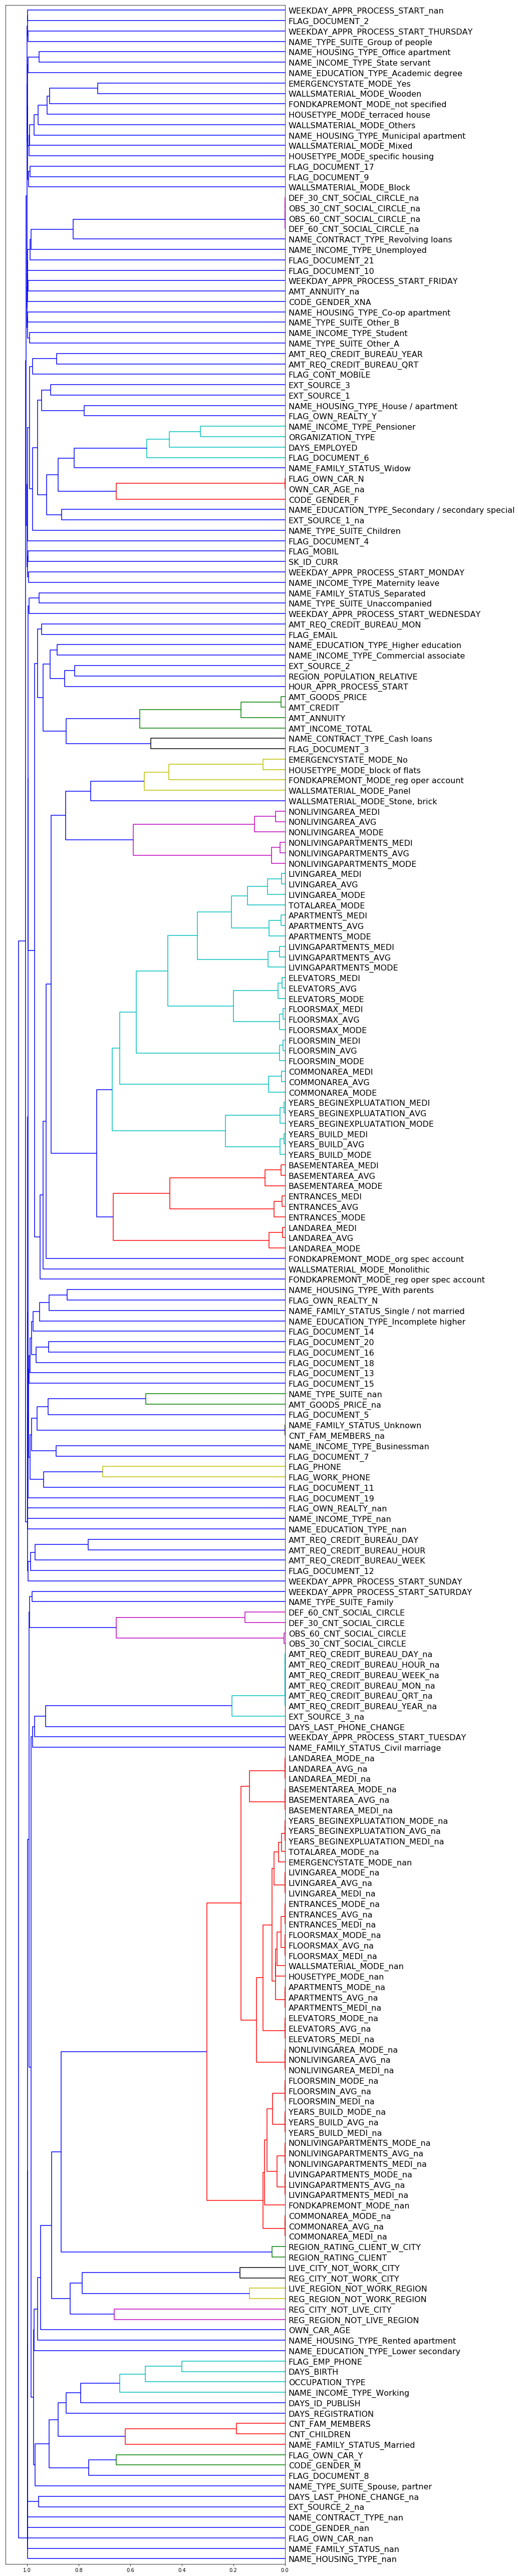

In [16]:
ddg.plot()

In [17]:
ddg.result.head(10)

,col1,col2,dist
0,AMT_REQ_CREDIT_BUREAU_HOUR_na,AMT_REQ_CREDIT_BUREAU_DAY_na,0.0
1,AMT_REQ_CREDIT_BUREAU_WEEK_na,---,0.0
2,AMT_REQ_CREDIT_BUREAU_MON_na,---,0.0
3,AMT_REQ_CREDIT_BUREAU_QRT_na,---,0.0
4,AMT_REQ_CREDIT_BUREAU_YEAR_na,---,0.0
5,YEARS_BEGINEXPLUATATION_AVG_na,YEARS_BEGINEXPLUATATION_MODE_na,0.0
6,YEARS_BEGINEXPLUATATION_MEDI_na,---,0.0
7,FLOORSMAX_AVG_na,FLOORSMAX_MODE_na,0.0
8,FLOORSMAX_MEDI_na,---,0.0
9,ENTRANCES_AVG_na,ENTRANCES_MODE_na,0.0


In [18]:
cluster = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
     ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
     ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
     ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
     ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'],
     ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE','TOTALAREA_MODE'],
     ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
     ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
     ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
     ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
     ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
     ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
     ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
     ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
     ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
     ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
     ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
     ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
     ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na','LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
      'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
      'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['YEARS_BEGINEXPLUATATION_AVG_na', 'YEARS_BEGINEXPLUATATION_MODE_na', 
      'YEARS_BEGINEXPLUATATION_MEDI_na', 'TOTALAREA_MODE_na', 'EMERGENCYSTATE_MODE_nan'],
     ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
     ['ENTRANCES_AVG_na', 'ENTRANCES_MODE_na', 'ENTRANCES_MEDI_na',
      'FLOORSMAX_AVG_na', 'FLOORSMAX_MODE_na', 'FLOORSMAX_MEDI_na', 'WALLSMATERIAL_MODE_nan'],
     ['APARTMENTS_AVG_na', 'APARTMENTS_MODE_na', 'APARTMENTS_MEDI_na', 'HOUSETYPE_MODE_nan'],
     ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
     ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
     ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
     ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
     ['NONLIVINGAPARTMENTS_AVG_na', 'NONLIVINGAPARTMENTS_MODE_na', 'NONLIVINGAPARTMENTS_MEDI_na'],
     ['LIVINGAPARTMENTS_AVG_na', 'LIVINGAPARTMENTS_MODE_na', 'LIVINGAPARTMENTS_MEDI_na'],
     ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
     ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [19]:
group_cols = ddg.group_cols(cluster)

In [20]:
group_cols

[['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'TOTALAREA_MODE'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
 ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['YEARS_BEGINEXPLUATATION_AVG_na',
  'YEARS_BEGINEXPLUATATION_MODE_na',
  'YEARS_BEGINEXPLUATATION_MEDI_na',
  'TOTALAREA_MODE_na',
  'EMERGENCYSTATE_MODE_nan'],
 ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
 ['ENTRANCES_AVG_na',
  'ENTRANCES_MODE_na',
  'ENTRANCES_MEDI_na',
  'FLOORSMAX_AVG_na',
  'FLOORSMAX_MODE_na',
  'FLOORSMAX_MEDI_na',
  'WALLSMATERIAL_MODE_nan'],
 ['APARTMENTS_AVG_na',
  'APARTMENTS_MODE_na',
  'APARTMENTS_MEDI_na',
  'HOUSETYPE_MODE_nan'],
 ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
 ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
 ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
 ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
 ['NONLIVINGAPARTMENTS_AVG_na',
  'NONLIVINGAPARTMENTS_MODE_na',
  'NONLIVINGAPARTMENTS_MEDI_na'],
 ['LIVINGAPARTMENTS_AVG_na',
  'LIVINGAPARTMENTS_MODE_na',
  'LIVINGAPARTMENTS_MEDI_na'],
 ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 'SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_na',
 'AMT_GOOD

# feature importance

In [21]:
impt = Importance.from_Learner(learner, ds, group_cols)

In [22]:
impt.I[:5]

,Feature,Importance
62,EXT_SOURCE_3,0.058051
61,EXT_SOURCE_2,0.046095
1,AMT_GOODS_PRICE & AMT_CREDIT & AMT_ANNUITY,0.020351
60,EXT_SOURCE_1,0.017711
40,DAYS_BIRTH,0.006564


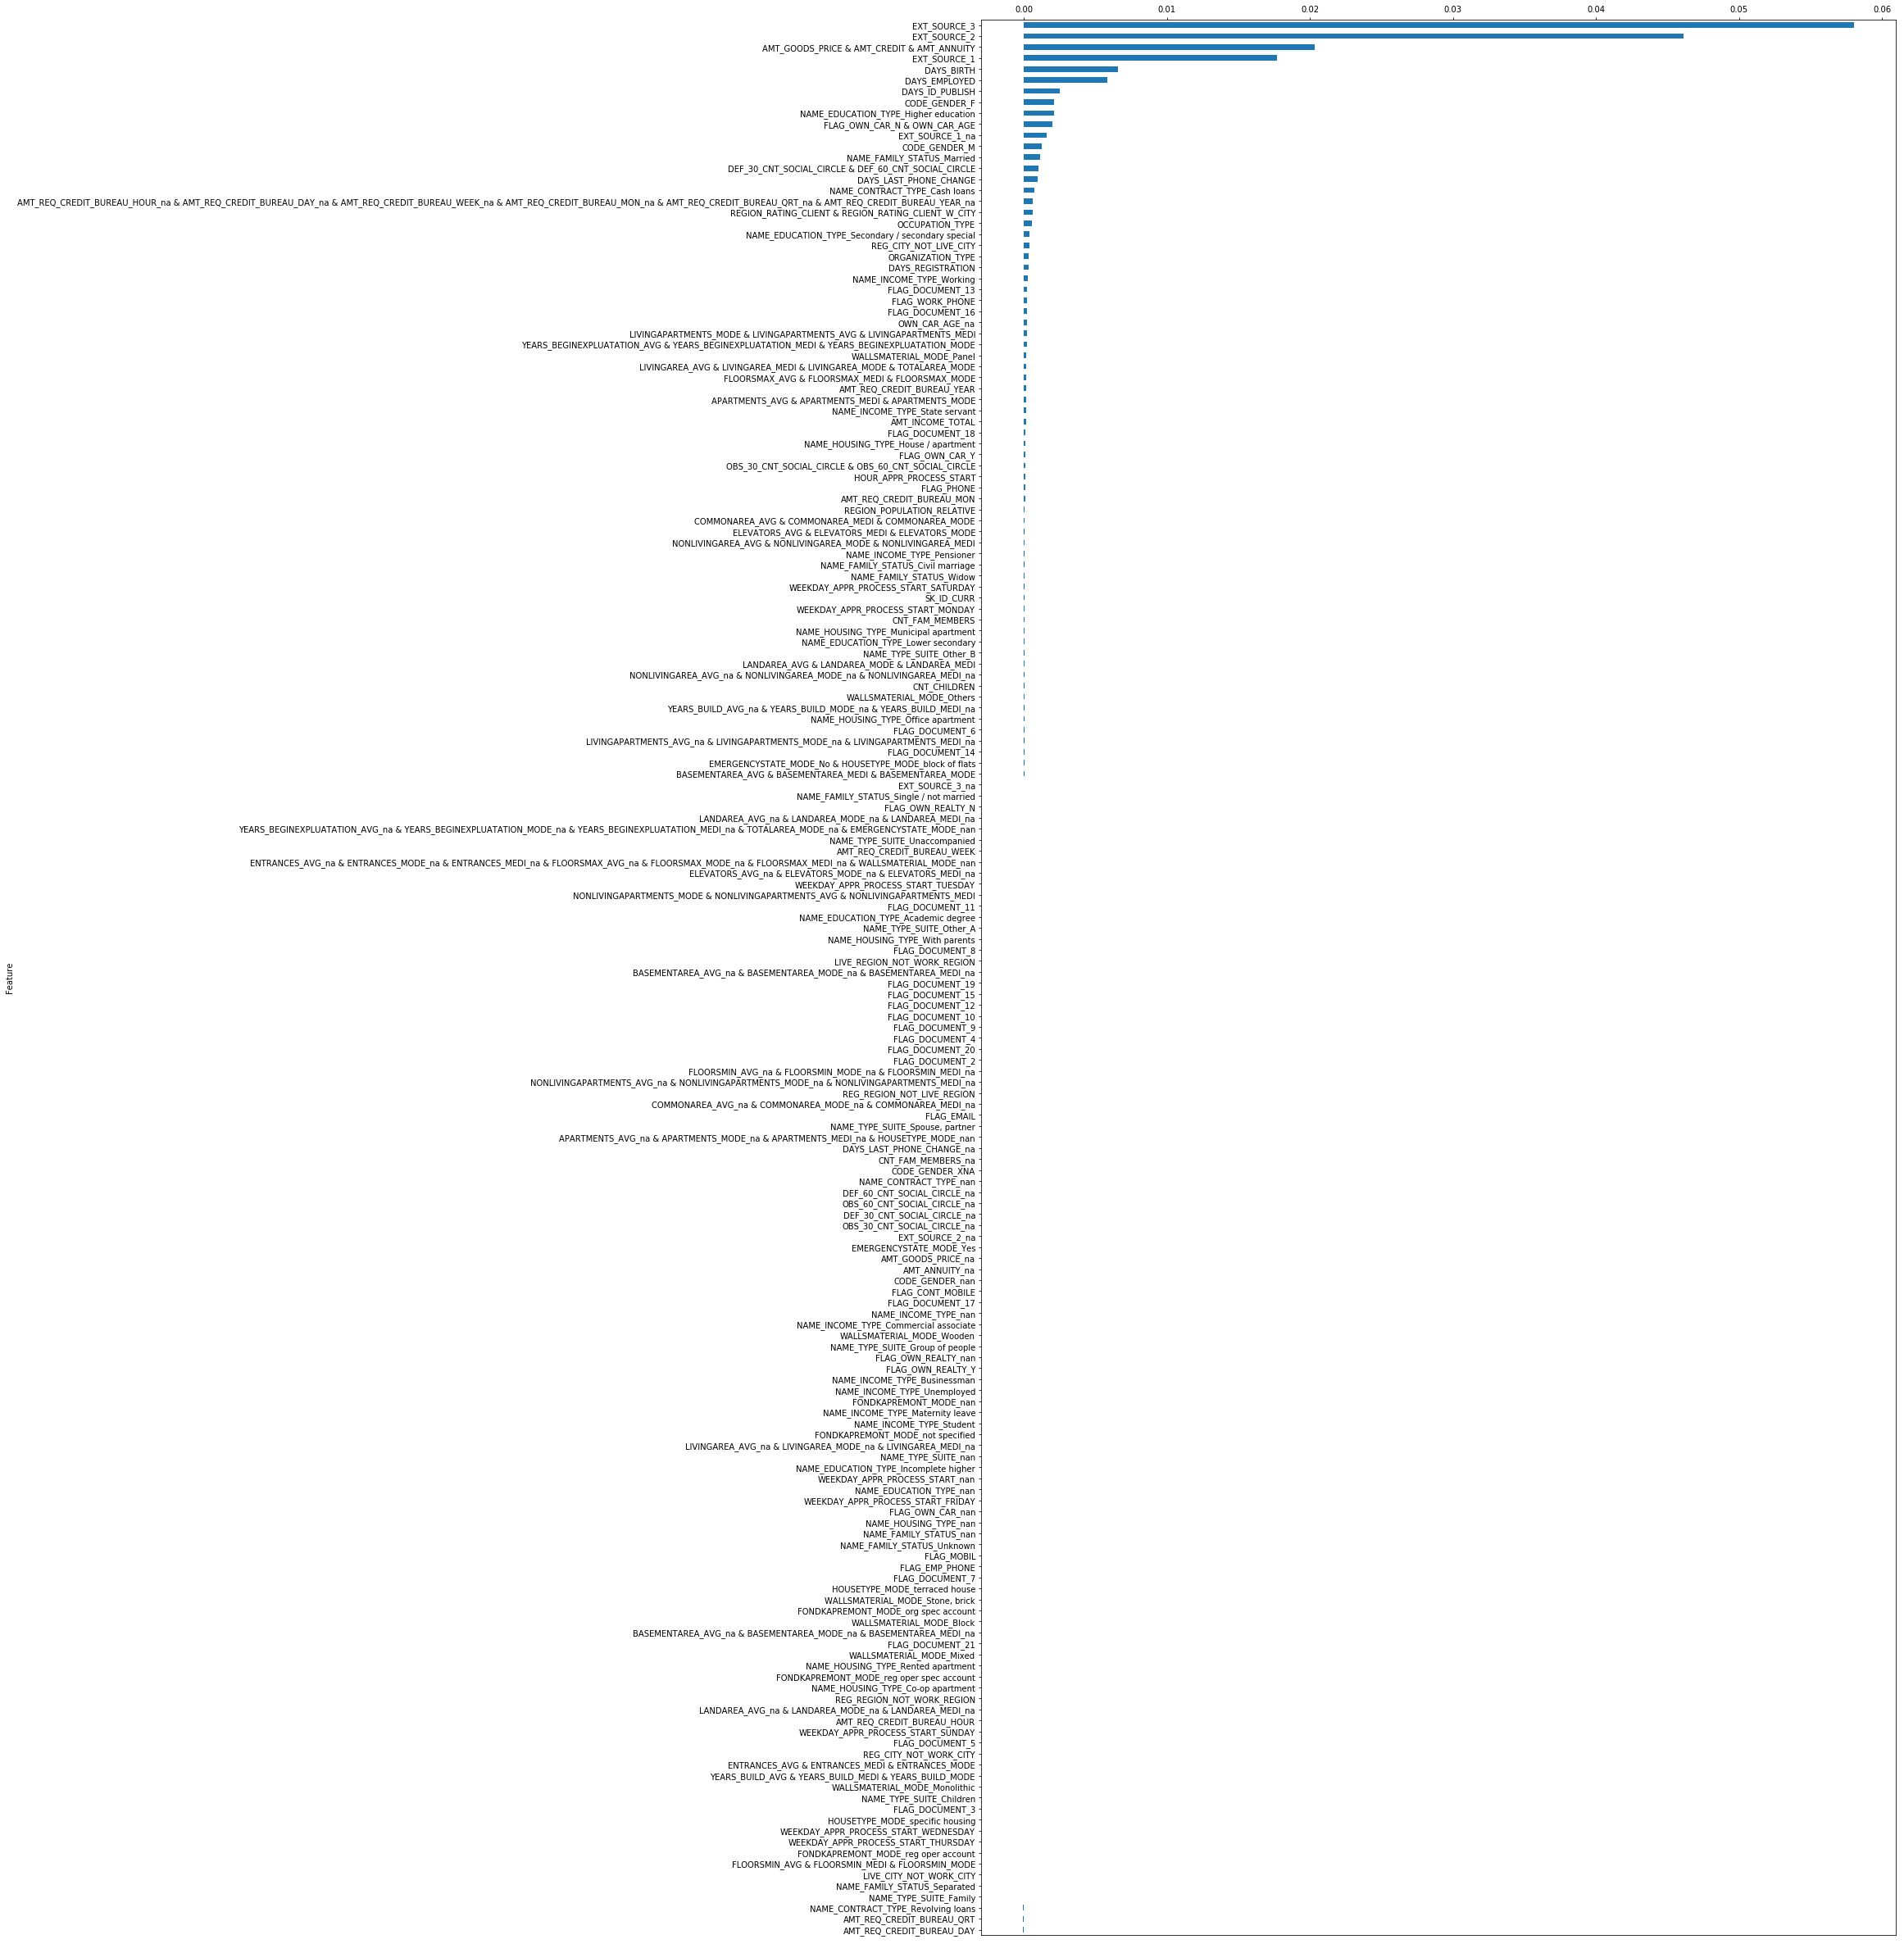

In [23]:
impt.plot()

In [26]:
impt.top(28)

[['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['DAYS_EMPLOYED'],
 ['DAYS_ID_PUBLISH'],
 ['CODE_GENDER_F'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['EXT_SOURCE_1_na'],
 ['CODE_GENDER_M'],
 ['NAME_FAMILY_STATUS_Married'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['DAYS_LAST_PHONE_CHANGE'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['OCCUPATION_TYPE'],
 ['NAME_EDUCATION_TYPE_Secondary / secondary special'],
 ['REG_CITY_NOT_LIVE_CITY'],
 ['ORGANIZATION_TYPE'],
 ['DAYS_REGISTRATION'],
 ['NAME_INCOME_TYPE_Working'],
 ['FLAG_DOCUMENT_13'],
 ['FLAG_WORK_PHONE'],
 ['FLAG_DOCUMENT_16'],
 ['OWN_CAR_AGE_na']]

In [27]:
ds.keep(flat_list(impt.top(28)))

In [11]:
impt_ft = [['EXT_SOURCE_3'], ['EXT_SOURCE_2'], ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'], ['EXT_SOURCE_1'], ['DAYS_BIRTH'], ['DAYS_EMPLOYED'], ['DAYS_ID_PUBLISH'], ['CODE_GENDER_F'], ['NAME_EDUCATION_TYPE_Higher education'], ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'], ['EXT_SOURCE_1_na'], ['CODE_GENDER_M'], ['NAME_FAMILY_STATUS_Married'], ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], ['DAYS_LAST_PHONE_CHANGE'], ['NAME_CONTRACT_TYPE_Cash loans'], ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'], ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'], ['OCCUPATION_TYPE'], ['NAME_EDUCATION_TYPE_Secondary / secondary special'], ['REG_CITY_NOT_LIVE_CITY'], ['ORGANIZATION_TYPE'], ['DAYS_REGISTRATION'], ['NAME_INCOME_TYPE_Working'], ['FLAG_DOCUMENT_13'], ['FLAG_WORK_PHONE'], ['FLAG_DOCUMENT_16'], ['OWN_CAR_AGE_na']]

In [12]:
ds.keep(flat_list(impt_ft))

# feature selection

In [13]:
ddg = Dendogram.from_df(ds.x_trn)

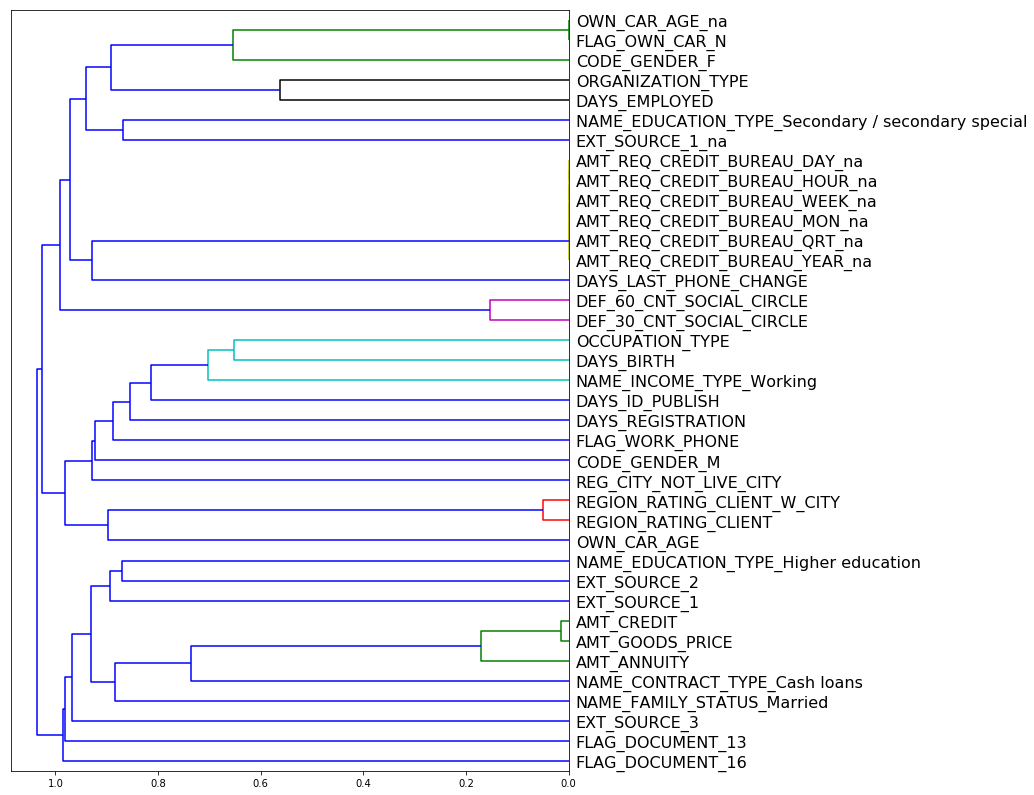

In [14]:
ddg.plot()

In [13]:
cluster = [#['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
            ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
            ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
            'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
            'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
            ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
            ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
            ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]

In [14]:
for cols in cluster:    
    for col in cols:
        print(col)
        params = {  'task': 'train',
                    'objective': 'binary',
                    'n_estimators':100,
                    'learning_rate':0.05,
                    'num_leaves':30,
                    'colsample_bytree':.8,
                    'subsample':.9,
                    'max_depth':7,
                    'reg_alpha':.1,
                    'reg_lambda':.1,
                    'min_split_gain':.01,
                    'min_child_weight':2,
                    'verbose':1,
                    'metric': 'binary_logloss'}
        learner.fit(params, *ds.drop(col, inplace=False), *ds.drop(col, inplace=False, tp = 'val'), 
                    early_stopping_rounds=50, verbose_eval=1000)
    print('\n')

AMT_GOODS_PRICE
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246731	valid_1's binary_logloss: 0.249483
AMT_CREDIT
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246251	valid_1's binary_logloss: 0.248798
AMT_ANNUITY
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246301	valid_1's binary_logloss: 0.248771


AMT_REQ_CREDIT_BUREAU_HOUR_na
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.245996	valid_1's binary_logloss: 0.248598
AMT_REQ_CREDIT_BUREAU_DAY_na
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.245996	

In [13]:
#'YEARS_BEGINEXPLUATATION_MODE',
ds.drop(['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
        'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
        'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'])

# opimizer

## messi things

In [ ]:
AMT_CREDIT

In [ ]:
DAYS_BIRTH

In [53]:
ds.features

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'AMT_ANNUITY', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CODE_GENDER_F',
       'NAME_EDUCATION_TYPE_Higher education', 'FLAG_OWN_CAR_N', 'OWN_CAR_AGE',
       'EXT_SOURCE_1_na', 'CODE_GENDER_M', 'NAME_FAMILY_STATUS_Married',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_CONTRACT_TYPE_Cash loans',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE', 'DAYS_REGISTRATION',
       'NAME_INCOME_TYPE_Working', 'FLAG_DOCUMENT_13', 'FLAG_WORK_PHONE',
       'FLAG_DOCUMENT_16', 'OWN_CAR_AGE_na'],
      dtype='object')

In [58]:
record = ds.x_val.iloc[[1]]

In [59]:
record

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY,EXT_SOURCE_1,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CODE_GENDER_F,...,OCCUPATION_TYPE,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,DAYS_REGISTRATION,NAME_INCOME_TYPE_Working,FLAG_DOCUMENT_13,FLAG_WORK_PHONE,FLAG_DOCUMENT_16,OWN_CAR_AGE_na
76814,0.222581,0.690986,1354500.0,1354500.0,51592.5,0.786415,-16636,-2621,-187,1,...,5,1,0,55,-3060.0,1,0,1,0,False


## optimizer

In [115]:
AMT_CREDIT = nn.Parameter(T(10000).float())

In [116]:
DAYS_BIRTH = nn.Parameter(T(-300).float())

In [118]:
optimizer.step()

In [ ]:
torch.clamp(output,min=1e-8,max=1-1e-8) 

In [136]:
??nn.BCELoss()

In [125]:
??F.binary_cross_entropy

In [124]:
??torch._C._nn.binary_cross_entropy

In [132]:
l.backward()

In [182]:
ds.x_trn.iloc[[2]]

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY,EXT_SOURCE_1,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CODE_GENDER_F,...,OCCUPATION_TYPE,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,DAYS_REGISTRATION,NAME_INCOME_TYPE_Working,FLAG_DOCUMENT_13,FLAG_WORK_PHONE,FLAG_DOCUMENT_16,OWN_CAR_AGE_na
176780,0.096319,0.005199,477000.0,552555.0,28341.0,0.630841,-16749,-7766,-251,0,...,9,0,0,12,-4165.0,1,0,0,0,False


In [183]:
ds.y_trn[2]

0

In [184]:
learner.predict(ds.x_trn.iloc[[2]])

array([0.77143])

In [188]:
ds.y_trn[3]

1

In [189]:
ds.x_trn.iloc[[3]]

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY,EXT_SOURCE_1,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CODE_GENDER_F,...,OCCUPATION_TYPE,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,DAYS_REGISTRATION,NAME_INCOME_TYPE_Working,FLAG_DOCUMENT_13,FLAG_WORK_PHONE,FLAG_DOCUMENT_16,OWN_CAR_AGE_na
171445,0.466864,0.592596,360000.0,360000.0,18378.0,0.764747,-18180,-1106,-1716,1,...,4,0,0,43,-1276.0,0,0,0,0,True


In [244]:
record = record.append([record['AMT_CREDIT']]*17500,ignore_index=True)

In [246]:
record = record.iloc[[0]]

In [248]:
record_all = record.append([record['AMT_CREDIT']]*17500,ignore_index=True)

In [256]:
record_all.reset_index( drop=True, inplace=True)

In [259]:
record_all.columns

Index([                                     'EXT_SOURCE_3',
                                            'EXT_SOURCE_2',
                                         'AMT_GOODS_PRICE',
                                              'AMT_CREDIT',
                                             'AMT_ANNUITY',
                                            'EXT_SOURCE_1',
                                              'DAYS_BIRTH',
                                           'DAYS_EMPLOYED',
                                         'DAYS_ID_PUBLISH',
                                           'CODE_GENDER_F',
                    'NAME_EDUCATION_TYPE_Higher education',
                                          'FLAG_OWN_CAR_N',
                                             'OWN_CAR_AGE',
                                         'EXT_SOURCE_1_na',
                                           'CODE_GENDER_M',
                              'NAME_FAMILY_STATUS_Married',
                                'DEF_30_

In [251]:
for i in record_all.columns: record_all[i] = record[i][0]

In [268]:
del record_all[6]

In [272]:
record_all['AMT_CREDIT'].shape

(17501,)

In [273]:
len(price)

17500

In [275]:
record_all = record_all[:-1]

In [276]:
record_all['AMT_CREDIT'] = price

In [278]:
pred = learner.predict(record_all)

In [280]:
a = pred*price*0.22

[<matplotlib.lines.Line2D at 0x7fda71e31940>]

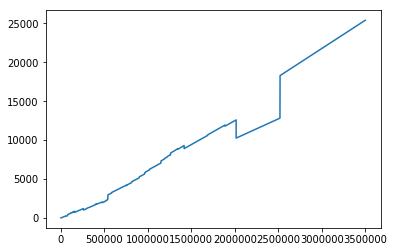

In [281]:
plt.plot(price, a)

In [190]:
learner.predict(ds.x_trn.iloc[[3]])

array([0.39258])

In [211]:
learner.predict(record)

array([0.46832])

In [243]:
len(price)

17500

In [241]:
price = list(range(1,3500000, 200))

In [214]:
profit = []

In [217]:
price[:4832]

[1,
 101,
 201,
 301,
 401,
 501,
 601,
 701,
 801,
 901,
 1001,
 1101,
 1201,
 1301,
 1401,
 1501,
 1601,
 1701,
 1801,
 1901,
 2001,
 2101,
 2201,
 2301,
 2401,
 2501,
 2601,
 2701,
 2801,
 2901,
 3001,
 3101,
 3201,
 3301,
 3401,
 3501,
 3601,
 3701,
 3801,
 3901,
 4001,
 4101,
 4201,
 4301,
 4401,
 4501,
 4601,
 4701,
 4801,
 4901,
 5001,
 5101,
 5201,
 5301,
 5401,
 5501,
 5601,
 5701,
 5801,
 5901,
 6001,
 6101,
 6201,
 6301,
 6401,
 6501,
 6601,
 6701,
 6801,
 6901,
 7001,
 7101,
 7201,
 7301,
 7401,
 7501,
 7601,
 7701,
 7801,
 7901,
 8001,
 8101,
 8201,
 8301,
 8401,
 8501,
 8601,
 8701,
 8801,
 8901,
 9001,
 9101,
 9201,
 9301,
 9401,
 9501,
 9601,
 9701,
 9801,
 9901,
 10001,
 10101,
 10201,
 10301,
 10401,
 10501,
 10601,
 10701,
 10801,
 10901,
 11001,
 11101,
 11201,
 11301,
 11401,
 11501,
 11601,
 11701,
 11801,
 11901,
 12001,
 12101,
 12201,
 12301,
 12401,
 12501,
 12601,
 12701,
 12801,
 12901,
 13001,
 13101,
 13201,
 13301,
 13401,
 13501,
 13601,
 13701,
 13801,
 13901,
 14001,
 14101,
 14201,
 14301,
 14401,
 14501,
 14601,
 14701,
 14801,
 14901,
 15001,
 15101,
 15201,
 15301,
 15401,
 15501,
 15601,
 15701,
 15801,
 15901,
 16001,
 16101,
 16201,
 16301,
 16401,
 16501,
 16601,
 16701,
 16801,
 16901,
 17001,
 17101,
 17201,
 17301,
 17401,
 17501,
 17601,
 17701,
 17801,
 17901,
 18001,
 18101,
 18201,
 18301,
 18401,
 18501,
 18601,
 18701,
 18801,
 18901,
 19001,
 19101,
 19201,
 19301,
 19401,
 19501,
 19601,
 19701,
 19801,
 19901,
 20001,
 20101,
 20201,
 20301,
 20401,
 20501,
 20601,
 20701,
 20801,
 20901,
 21001,
 21101,
 21201,
 21301,
 21401,
 21501,
 21601,
 21701,
 21801,
 21901,
 22001,
 22101,
 22201,
 22301,
 22401,
 22501,
 22601,
 22701,
 22801,
 22901,
 23001,
 23101,
 23201,
 23301,
 23401,
 23501,
 23601,
 23701,
 23801,
 23901,
 24001,
 24101,
 24201,
 24301,
 24401,
 24501,
 24601,
 24701,
 24801,
 24901,
 25001,
 25101,
 25201,
 25301,
 25401,
 25501,
 25601,
 25701,
 25801,
 25901,
 26001,
 26101,
 26201,
 26301,
 26401,
 26501,
 26601,
 26701,
 26801,
 26901,
 27001,
 27101,
 27201,
 27301,
 27401,
 27501,
 27601,
 27701,
 27801,
 27901,
 28001,
 28101,
 28201,
 28301,
 28401,
 28501,
 28601,
 28701,
 28801,
 28901,
 29001,
 29101,
 29201,
 29301,
 29401,
 29501,
 29601,
 29701,
 29801,
 29901,
 30001,
 30101,
 30201,
 30301,
 30401,
 30501,
 30601,
 30701,
 30801,
 30901,
 31001,
 31101,
 31201,
 31301,
 31401,
 31501,
 31601,
 31701,
 31801,
 31901,
 32001,
 32101,
 32201,
 32301,
 32401,
 32501,
 32601,
 32701,
 32801,
 32901,
 33001,
 33101,
 33201,
 33301,
 33401,
 33501,
 33601,
 33701,
 33801,
 33901,
 34001,
 34101,
 34201,
 34301,
 34401,
 34501,
 34601,
 34701,
 34801,
 34901,
 35001,
 35101,
 35201,
 35301,
 35401,
 35501,
 35601,
 35701,
 35801,
 35901,
 36001,
 36101,
 36201,
 36301,
 36401,
 36501,
 36601,
 36701,
 36801,
 36901,
 37001,
 37101,
 37201,
 37301,
 37401,
 37501,
 37601,
 37701,
 37801,
 37901,
 38001,
 38101,
 38201,
 38301,
 38401,
 38501,
 38601,
 38701,
 38801,
 38901,
 39001,
 39101,
 39201,
 39301,
 39401,
 39501,
 39601,
 39701,
 39801,
 39901,
 40001,
 40101,
 40201,
 40301,
 40401,
 40501,
 40601,
 40701,
 40801,
 40901,
 41001,
 41101,
 41201,
 41301,
 41401,
 41501,
 41601,
 41701,
 41801,
 41901,
 42001,
 42101,
 42201,
 42301,
 42401,
 42501,
 42601,
 42701,
 42801,
 42901,
 43001,
 43101,
 43201,
 43301,
 43401,
 43501,
 43601,
 43701,
 43801,
 43901,
 44001,
 44101,
 44201,
 44301,
 44401,
 44501,
 44601,
 44701,
 44801,
 44901,
 45001,
 45101,
 45201,
 45301,
 45401,
 45501,
 45601,
 45701,
 45801,
 45901,
 46001,
 46101,
 46201,
 46301,
 46401,
 46501,
 46601,
 46701,
 46801,
 46901,
 47001,
 47101,
 47201,
 47301,
 47401,
 47501,
 47601,
 47701,
 47801,
 47901,
 48001,
 48101,
 48201,
 48301,
 48401,
 48501,
 48601,
 48701,
 48801,
 48901,
 49001,
 49101,
 49201,
 49301,
 49401,
 49501,
 49601,
 49701,
 49801,
 49901,
 50001,
 50101,
 50201,
 50301,
 50401,
 50501,
 50601,
 50701,
 50801,
 50901,
 51001,
 51101,
 51201,
 51301,


In [221]:
record['AMT_CREDIT'] = 1000000

In [222]:
learner.predict(record)

array([0.66496])

In [225]:
ds.x_trn.shape

(246008, 32)

In [229]:
ds.trn

<bound method TBDataset.trn of <tabint.dataset.TBDataset object at 0x7fdaed11e8d0>>

In [282]:
trn_drp = ds.x_trn.drop

In [283]:
df = ds.x_trn

In [284]:
df.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'AMT_ANNUITY', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CODE_GENDER_F',
       'NAME_EDUCATION_TYPE_Higher education', 'FLAG_OWN_CAR_N', 'OWN_CAR_AGE',
       'EXT_SOURCE_1_na', 'CODE_GENDER_M', 'NAME_FAMILY_STATUS_Married',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_CONTRACT_TYPE_Cash loans',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE', 'DAYS_REGISTRATION',
       'NAME_INCOME_TYPE_Working', 'FLAG_DOCUMENT_13', 'FLAG_WORK_PHONE',
       'FLAG_DOCUMENT_16', 'OWN_CAR_AGE_na'],
      dtype='object')

In [296]:
tfs = {
        'apply':{'EXT_SOURCE': lambda df: df['EXT_SOURCE_3']*df['EXT_SOURCE_2']*df['EXT_SOURCE_1']},
        'drop': {'EXT_SOURCE', 'a'}
        }

In [298]:
for keys in tfs.keys():
    for key in tfs[keys]:
        tfs[keys][key]

TypeError: 'set' object is not subscriptable

In [289]:
for key in tfs.keys():
    df[key] = tfs[key](df)
    print(key)

EXT_SOURCE


In [290]:
df.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'AMT_ANNUITY', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CODE_GENDER_F',
       'NAME_EDUCATION_TYPE_Higher education', 'FLAG_OWN_CAR_N', 'OWN_CAR_AGE',
       'EXT_SOURCE_1_na', 'CODE_GENDER_M', 'NAME_FAMILY_STATUS_Married',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_CONTRACT_TYPE_Cash loans',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE', 'DAYS_REGISTRATION',
       'NAME_INCOME_TYPE_Working', 'FLAG_DOCUMENT_13', 'FLAG_WORK_PHONE',
       'FLAG_DOCUMENT_16', 'OWN_CAR_AGE_na', 'EXT_SOURCE'],
      dtype='object')

In [233]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':4000,
    'learning_rate':0.03,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [234]:
learner.fit(params, *ds.trn(), *ds.val())

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.255105	valid_1's binary_logloss: 0.258045
[200]	training's binary_logloss: 0.243655	valid_1's binary_logloss: 0.249627
[300]	training's binary_logloss: 0.239726	valid_1's binary_logloss: 0.24818
[400]	training's binary_logloss: 0.236981	valid_1's binary_logloss: 0.247711
[500]	training's binary_logloss: 0.234671	valid_1's binary_logloss: 0.247477
[600]	training's binary_logloss: 0.232492	valid_1's binary_logloss: 0.247455
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.23302	valid_1's binary_logloss: 0.247436


In [235]:
Shap2 = SHAP.from_Tree(learner, ds)

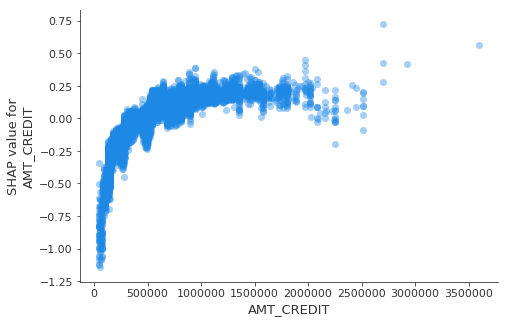

In [236]:
Shap2.dependence_plot('AMT_CREDIT', None, alpha=0.4)

In [215]:
for i in price:
    record['AMT_CREDIT'] = i
    pred = learner.predict(record)
    profit.append(i*pred[0]*0.22)

KeyboardInterrupt: 

[<matplotlib.lines.Line2D at 0x7fda72b8bcf8>]

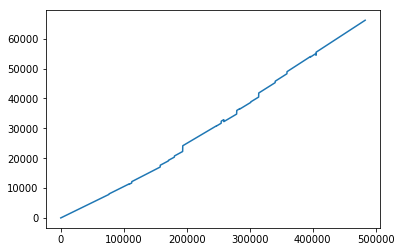

In [218]:
plt.plot(price[:4832], profit)

In [196]:
def loss(AMT_CREDIT):
    #record['DAYS_BIRTH'] = to_np(DAYS_BIRTH)[0]
    record['AMT_CREDIT'] = to_np(AMT_CREDIT)[0]
    pred = learner.predict(record)
    #pdb.set_trace()
    return (1e7 - AMT_CREDIT*pred[0]*0.22) #*(AMT_CREDIT*(1-pred[0]))

In [205]:
optimizer= optim.Adam([AMT_CREDIT], lr = 500)

In [ ]:
lss = []

In [206]:
for t in range(2000):
    l = loss(AMT_CREDIT)
    lss.append(to_np(l)[0])
    #print('DAYS_BIRTH: ', DAYS_BIRTH)
    print('AMT_CREDIT:', to_np(AMT_CREDIT), "|", 'loss:', to_np(l), end='\r')
    
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

[<matplotlib.lines.Line2D at 0x7fda72cb36a0>]

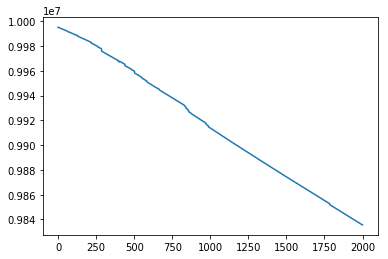

In [207]:
plt.plot(lss)